# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów.
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [2]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

# fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
# for fileName in fileNames:
#   if not os.path.exists(fileName):
#       r = requests.get(url + fileName, allow_redirects=True)
#       open(fileName, 'wb').write(r.content)



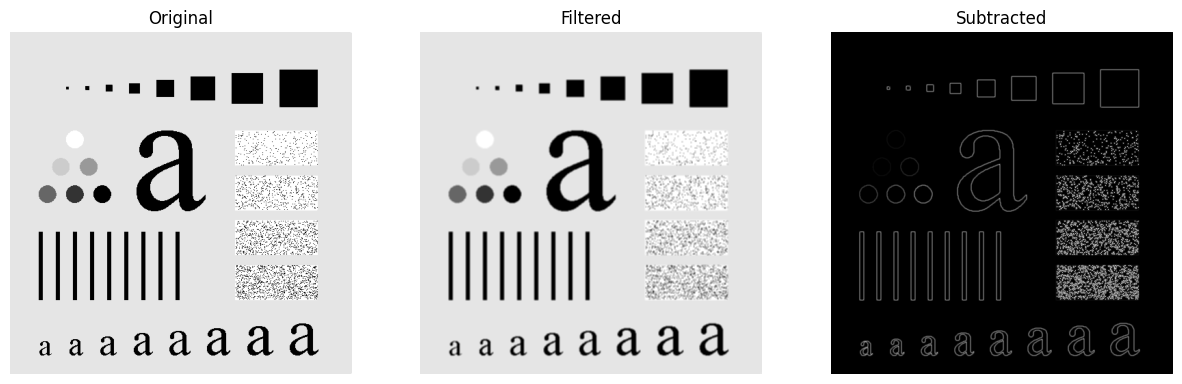

In [3]:
kernel = np.ones((3, 3), np.uint8)/9

img = cv2.imread('plansza.png', cv2.IMREAD_GRAYSCALE)

img_filter = cv2.filter2D(img, -1, kernel)

img_sub = cv2.absdiff(img_filter, img)

fig, axs = plt.subplots(1, 3, figsize= (15, 15))
axs[0].imshow(img, 'gray')
axs[0].axis('off')
axs[0].set_title('Original')
axs[1].imshow(img_filter, 'gray')
axs[1].axis('off')
axs[1].set_title('Filtered')
axs[2].imshow(img_sub, 'gray')
axs[2].axis('off')
axs[2].set_title('Subtracted')
plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35.
Wykorzystaj polecenie `plt.subplot`.
Przeanalizuj wpływ rozmiaru maski na wynik.

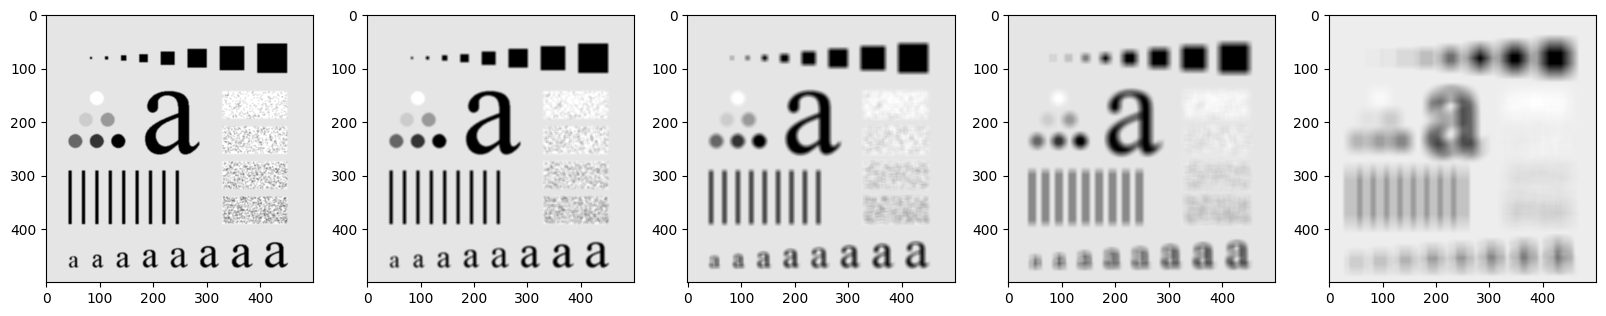

In [4]:
img = cv2.imread('plansza.png', cv2.IMREAD_GRAYSCALE)

kernel_3x3 = np.ones((3, 3), np.uint8) / 9
kernel_5x5 = np.ones((5, 5), np.uint8) / 25
kernel_9x9 = np.ones((9, 9), np.uint8) / 81
kernel_15x15 = np.ones((15, 15), np.uint8) / 225
kernel_35x35 = np.ones((35, 35), np.uint8) / 1225

fig, axs = plt.subplots(1, 5, figsize=(20, 20))
axs[0].imshow(cv2.filter2D(img, -1, kernel_3x3), 'gray')
axs[1].imshow(cv2.filter2D(img, -1, kernel_5x5), 'gray')
axs[2].imshow(cv2.filter2D(img, -1, kernel_9x9), 'gray')
axs[3].imshow(cv2.filter2D(img, -1, kernel_15x15), 'gray')
axs[4].imshow(cv2.filter2D(img, -1, kernel_35x35), 'gray')
plt.show()

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

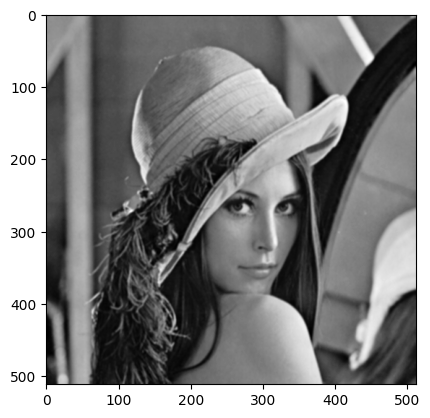

In [5]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

img_filter = cv2.filter2D(img, -1, kernel_3x3)

plt.imshow(img_filter, 'gray')

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości.
Częściowo można go zniwelować poprzez odpowiedni dobór maski.
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`.
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

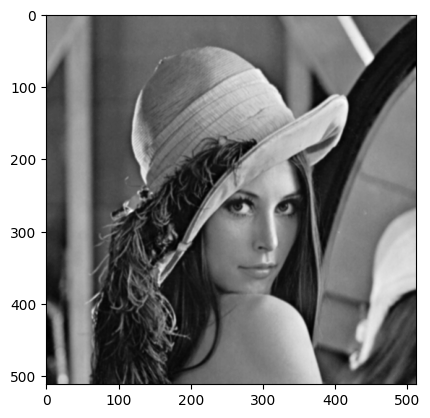

In [6]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

M = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
kernel = np.array(M)/np.sum(M)

img_filter = cv2.filter2D(img, -1, kernel)

plt.imshow(img_filter, 'gray')

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa.
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [7]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum()


def mesh(fun, size):
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')


    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun

    ax.plot_surface(X, Y, Z)

    plt.show()




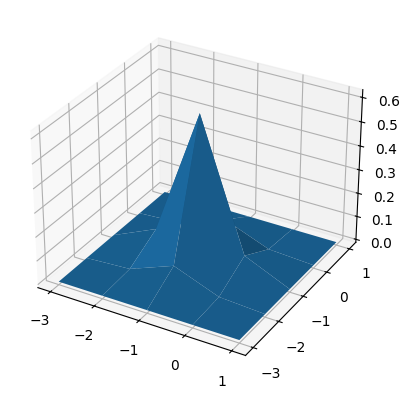

In [8]:
gauss = fgaussian(5, 0.5)

mesh(gauss, 5)

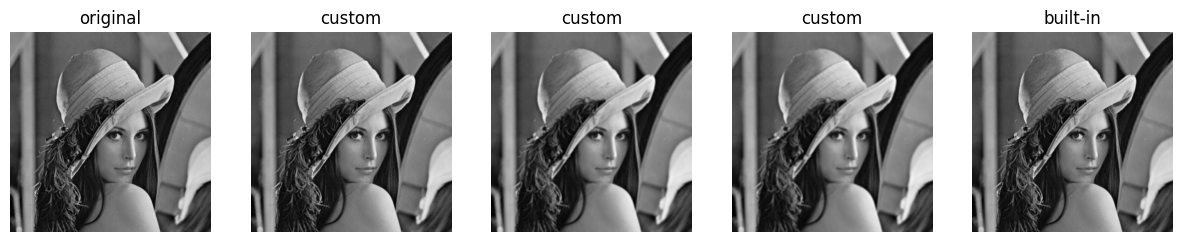

In [9]:
kernel_gauss_0_5 = fgaussian(5, 0.5)
kernel_gauss_1_5 = fgaussian(5, 1.5)
kernel_gauss_2_5 = fgaussian(5, 2.5)
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(1, 5, figsize= (15, 15))
axs[0].imshow(img, 'gray')
axs[0].set_title('original')
axs[0].axis('off')
axs[1].imshow(cv2.filter2D(img, -1, kernel_gauss_0_5), 'gray')
axs[1].set_title('custom')
axs[1].axis('off')
axs[2].imshow(cv2.filter2D(img, -1, kernel_gauss_1_5), 'gray')
axs[2].set_title('custom')
axs[2].axis('off')
axs[3].imshow(cv2.filter2D(img, -1, kernel_gauss_2_5), 'gray')
axs[3].set_title('custom')
axs[3].axis('off')
axs[4].imshow(cv2.GaussianBlur(img, (5, 5), 0.5), 'gray')
axs[4].set_title('built-in')
axs[4].axis('off')
plt.show()

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


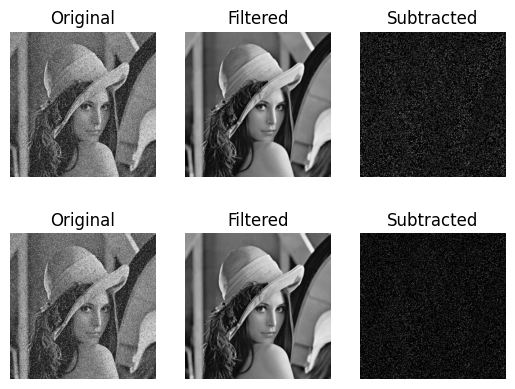

In [10]:
img = cv2.imread('lenaSzum.png', cv2.IMREAD_GRAYSCALE)
img_filtered = cv2.filter2D(img, -1, kernel_3x3)
img_diff = cv2.absdiff(img, img_filtered)

fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(img, 'gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('Original')
axs[0, 1].imshow(img_filter, 'gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('Filtered')
axs[0, 2].imshow(img_diff, 'gray')
axs[0, 2].axis('off')
axs[0, 2].set_title('Subtracted')

img = cv2.imread('lenaSzum.png', cv2.IMREAD_GRAYSCALE)
img_filtered = cv2.medianBlur(img, 3)
img_diff = cv2.absdiff(img, img_filtered)

axs[1, 0].imshow(img, 'gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('Original')
axs[1, 1].imshow(img_filter, 'gray')
axs[1, 1].axis('off')
axs[1, 1].set_title('Filtered')
axs[1, 2].imshow(img_diff, 'gray')
axs[1, 2].axis('off')
axs[1, 2].set_title('Subtracted')
plt.show()

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

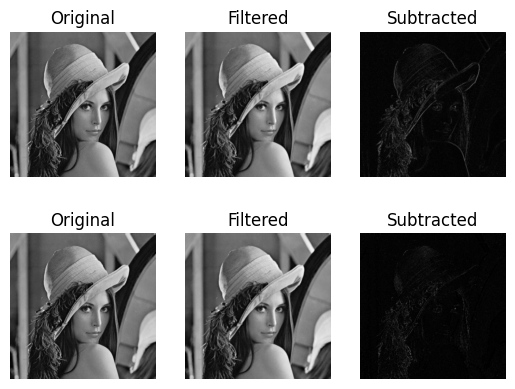

In [11]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
img_filtered = cv2.filter2D(img, -1, kernel_3x3)
img_diff = cv2.absdiff(img, img_filtered)

fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(img, 'gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('Original')
axs[0, 1].imshow(img_filter, 'gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('Filtered')
axs[0, 2].imshow(img_diff, 'gray')
axs[0, 2].axis('off')
axs[0, 2].set_title('Subtracted')

img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
img_filtered = cv2.medianBlur(img, 3)
img_diff = cv2.absdiff(img, img_filtered)

axs[1, 0].imshow(img, 'gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('Original')
axs[1, 1].imshow(img_filter, 'gray')
axs[1, 1].axis('off')
axs[1, 1].set_title('Filtered')
axs[1, 2].imshow(img_diff, 'gray')
axs[1, 2].axis('off')
axs[1, 2].set_title('Subtracted')
plt.show()

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

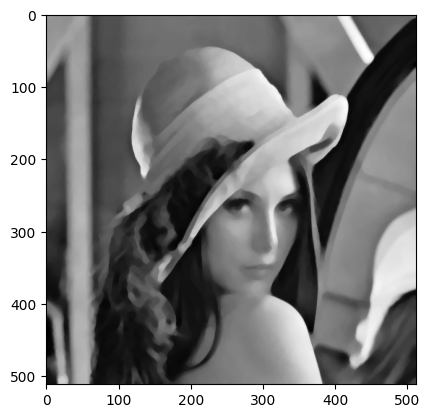

In [12]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

for i in range(10):
    cv2.medianBlur(img, 5, img)

plt.imshow(img, 'gray')

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M =
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje.
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach.

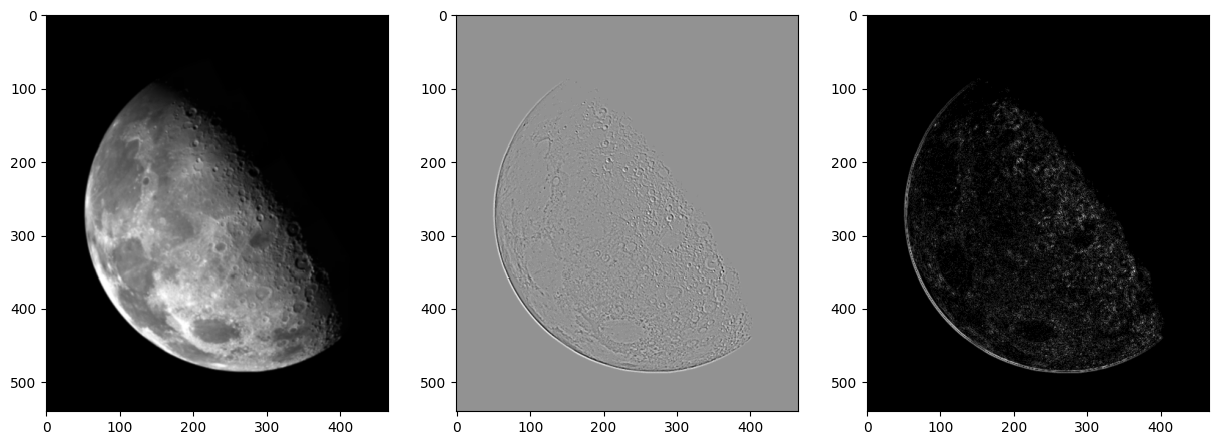

In [13]:
img = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.int16)

laplasjan = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) / 9

img_conv = cv2.filter2D(img, -1, laplasjan)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(img, 'gray')
axs[1].imshow(img_conv + 128, 'gray')
axs[2].imshow(np.abs(img_conv), 'gray')
plt.show()

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



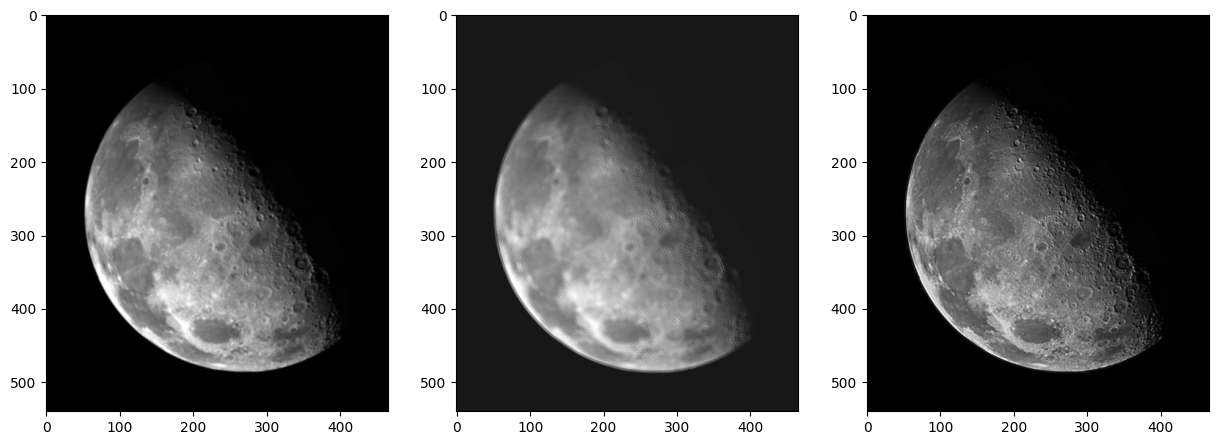

In [14]:
img = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.int16)

laplasjan = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  # Should I divide by 9?

img_conv = cv2.filter2D(img, -1, laplasjan)
img_add = img + img_conv
img_sub = np.abs(img - img_conv)

img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
img_add = cv2.normalize(img_add, None, 0, 255, cv2.NORM_MINMAX)
img_sub = cv2.normalize(img_sub, None, 0, 255, cv2.NORM_MINMAX)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(img, 'gray')
axs[1].imshow(img_add, 'gray')
axs[2].imshow(img_sub, 'gray')
plt.show()

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela.

In [15]:
# Gradient Roberts - Maski
R1 = np.array([[0, 0, 0], [-1, 0, 0], [0, 1, 0]])
R2 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])

# Gradient Prewitta - Maski
P1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
P2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Gradient Sobela - Maski
S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

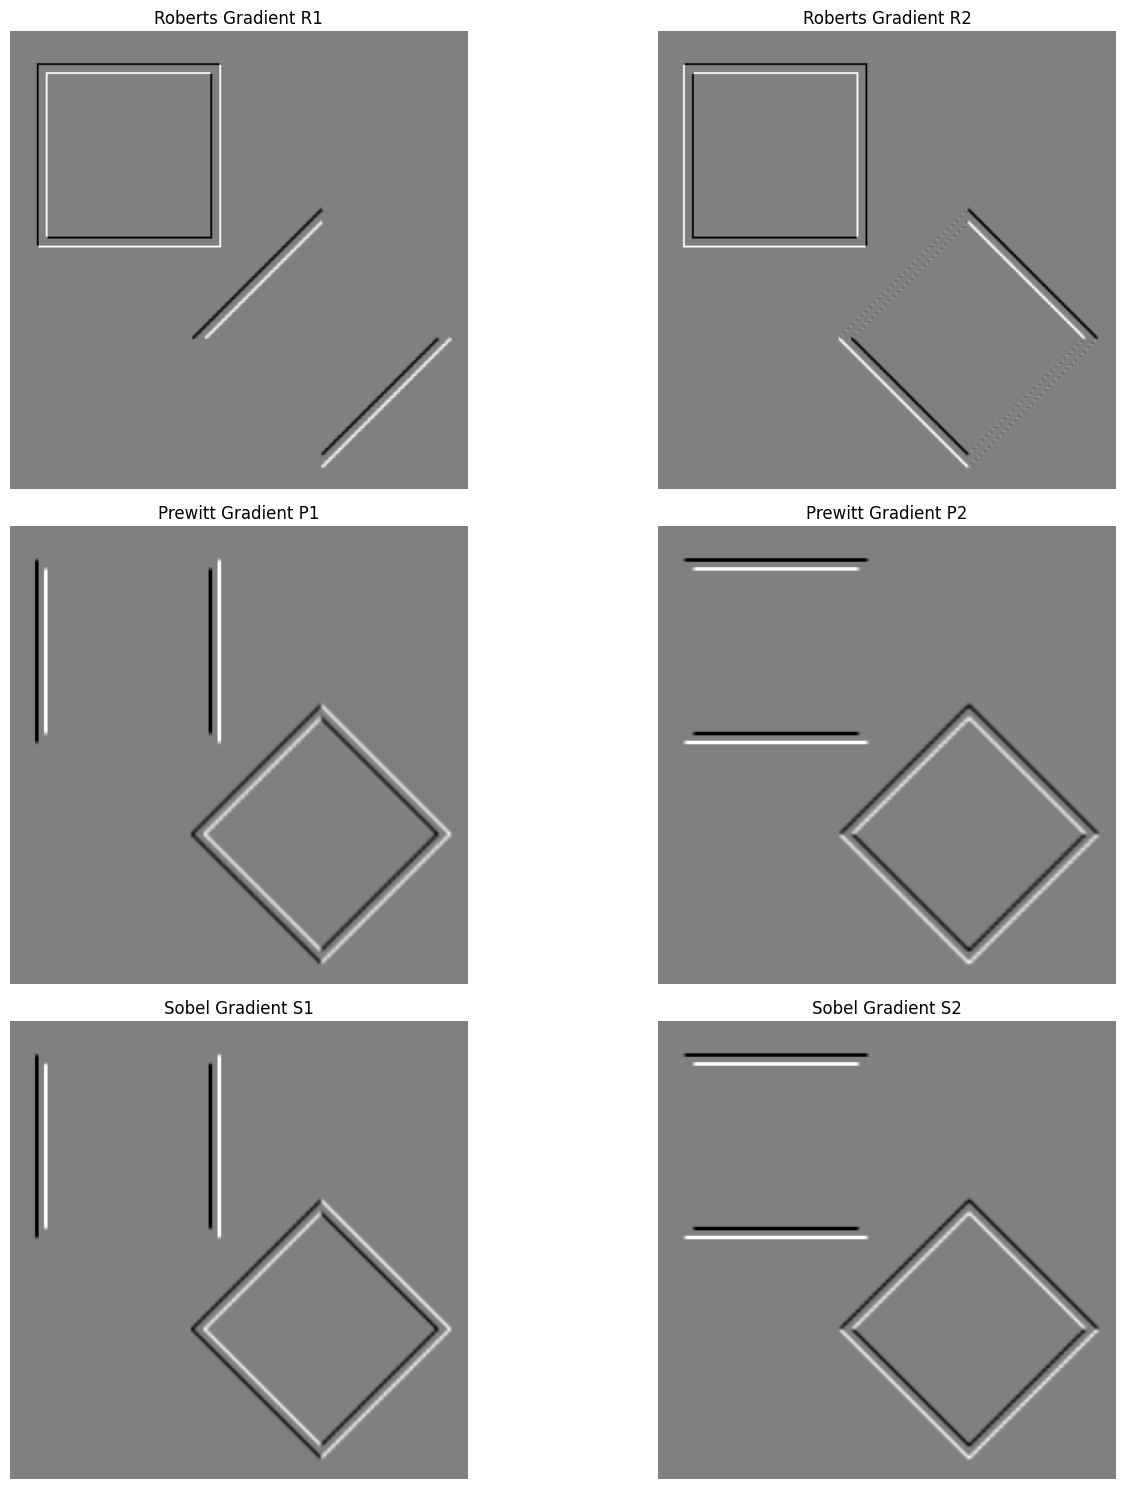

In [16]:
img = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.int16)

img_R1 = cv2.filter2D(img, -1, R1)
img_R2 = cv2.filter2D(img, -1, R2)
img_P1 = cv2.filter2D(img, -1, P1)
img_P2 = cv2.filter2D(img, -1, P2)
img_S1 = cv2.filter2D(img, -1, S1)
img_S2 = cv2.filter2D(img, -1, S2)

img_R1 = cv2.normalize(img_R1, None, 0, 255, cv2.NORM_MINMAX)
img_R2 = cv2.normalize(img_R2, None, 0, 255, cv2.NORM_MINMAX)
img_P1 = cv2.normalize(img_P1, None, 0, 255, cv2.NORM_MINMAX)
img_P2 = cv2.normalize(img_P2, None, 0, 255, cv2.NORM_MINMAX)
img_S1 = cv2.normalize(img_S1, None, 0, 255, cv2.NORM_MINMAX)
img_S2 = cv2.normalize(img_S2, None, 0, 255, cv2.NORM_MINMAX)

# Plot all 6 images
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Display each filtered image with a corresponding title
axs[0, 0].imshow(img_R1, cmap='gray')
axs[0, 0].set_title('Roberts Gradient R1')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_R2, cmap='gray')
axs[0, 1].set_title('Roberts Gradient R2')
axs[0, 1].axis('off')

axs[1, 0].imshow(img_P1, cmap='gray')
axs[1, 0].set_title('Prewitt Gradient P1')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_P2, cmap='gray')
axs[1, 1].set_title('Prewitt Gradient P2')
axs[1, 1].axis('off')

axs[2, 0].imshow(img_S1, cmap='gray')
axs[2, 0].set_title('Sobel Gradient S1')
axs[2, 0].axis('off')

axs[2, 1].imshow(img_S2, cmap='gray')
axs[2, 1].set_title('Sobel Gradient S2')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



0 255


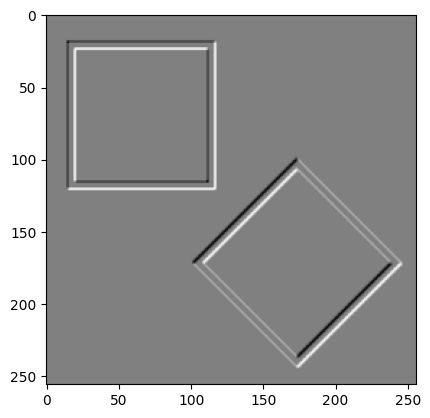

In [ ]:
img_S = np.sqrt(np.power(img_S1.astype(np.int32), 2) + np.power(img_S2.astype(np.int32), 2)).astype(np.int16)
img_S = cv2.normalize(img_S, None, 0, 255, cv2.NORM_MINMAX)

plt.imshow(img_S, cmap='gray')

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia).
Zaimplementuj tę wersję.

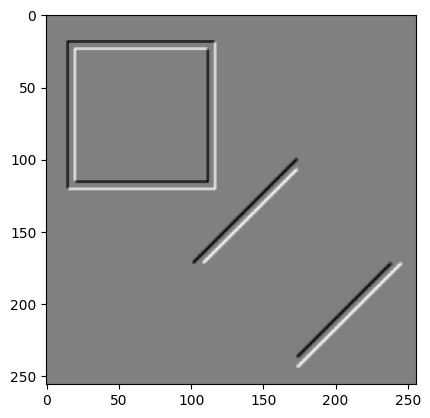

In [35]:
img_S = (np.abs(img_S1.astype(np.int32)) + np.abs(img_S2.astype(np.int32))).astype(np.int16)

plt.imshow(img_S, cmap='gray')

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

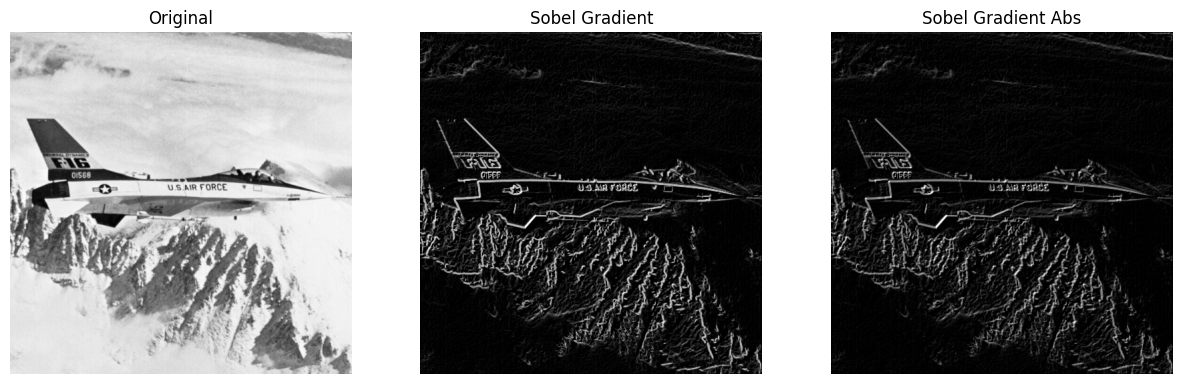

In [36]:
jet = cv2.imread('jet.png', cv2.IMREAD_GRAYSCALE)

jet1 = cv2.filter2D(jet, -1, S1)
jet2 = cv2.filter2D(jet, -1, S2)

jet_S = np.sqrt(np.power(jet1.astype(np.int32), 2) + np.power(jet2.astype(np.int32), 2)).astype(np.int16)
jet_S_abs = (np.abs(jet1.astype(np.int32)) + np.abs(jet2.astype(np.int32))).astype(np.int16)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(jet, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(jet_S, cmap='gray')
axs[1].set_title('Sobel Gradient')
axs[1].axis('off')
axs[2].imshow(jet_S_abs, cmap='gray')
axs[2].set_title('Sobel Gradient Abs')
axs[2].axis('off')
plt.show()
